American Call Option Price: 10.43
American Put Option Price: 6.08


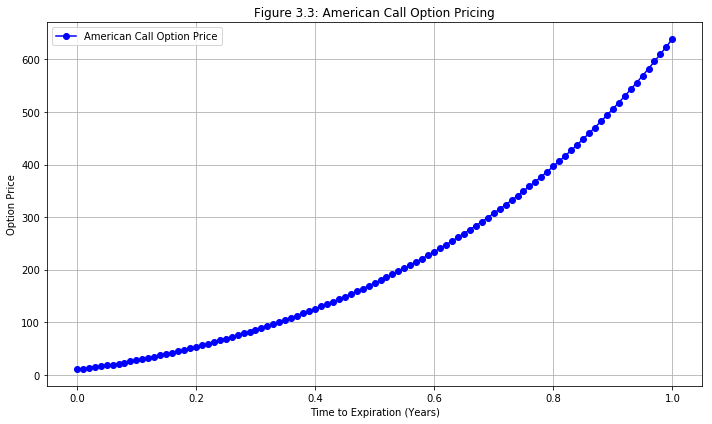

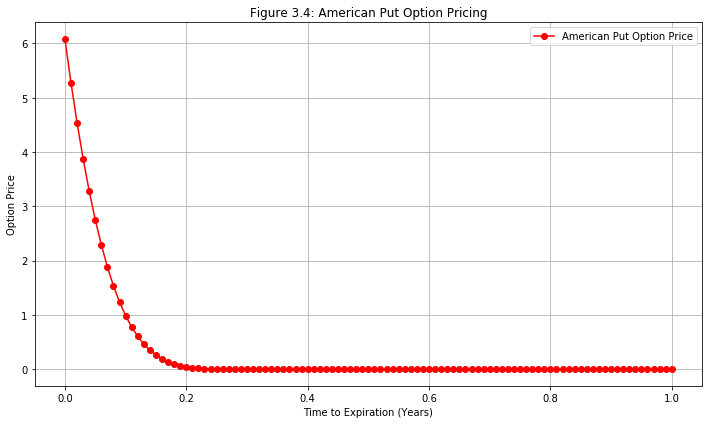

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# American Option Pricing using Binomial Tree
def american_option(S0, K, T, r, sigma, n, option_type="call"):
    dt = T / n                      # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Upward movement factor
    d = 1 / u                       # Downward movement factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Asset price tree
    ST = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            ST[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Option value tree
    option_tree = np.zeros((n + 1, n + 1))

    # Terminal payoffs
    for j in range(n + 1):
        if option_type == "call":
            option_tree[j, n] = max(0, ST[j, n] - K)
        elif option_type == "put":
            option_tree[j, n] = max(0, K - ST[j, n])

    # Backward induction for American option
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            continuation = np.exp(-r * dt) * (
                p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1]
            )
            if option_type == "call":
                option_tree[j, i] = max(ST[j, i] - K, continuation)
            elif option_type == "put":
                option_tree[j, i] = max(K - ST[j, i], continuation)

    return option_tree, ST

# Parameters
S0 = 100       # Initial asset price
K = 100        # Strike price
T = 1          # Time to maturity (1 year)
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility
n = 100        # Number of time steps

# Call and Put pricing
call_tree, ST = american_option(S0, K, T, r, sigma, n, option_type="call")
put_tree, _   = american_option(S0, K, T, r, sigma, n, option_type="put")

# Print prices
print(f"American Call Option Price: {call_tree[0, 0]:.2f}")
print(f"American Put Option Price: {put_tree[0, 0]:.2f}")

# Time axis
time_steps = np.linspace(0, T, n + 1)

# Output directory
save_dir = r"F:\GITHUB\computational-finance-models\chart"
os.makedirs(save_dir, exist_ok=True)

# --- Figure 3.3: American Call Option Pricing ---
plt.figure(figsize=(10, 6))
plt.plot(time_steps, call_tree[0, :], 'bo-', label="American Call Option Price")
plt.xlabel("Time to Expiration (Years)")
plt.ylabel("Option Price")
plt.title("Figure 3.3: American Call Option Pricing")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "Figure_3_3_American_Call_Option_Pricing.png"))
plt.show()

# --- Figure 3.4: American Put Option Pricing ---
plt.figure(figsize=(10, 6))
plt.plot(time_steps, put_tree[0, :], 'ro-', label="American Put Option Price")
plt.xlabel("Time to Expiration (Years)")
plt.ylabel("Option Price")
plt.title("Figure 3.4: American Put Option Pricing")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "Figure_3_4_American_Put_Option_Pricing.png"))
plt.show()
